In [1]:
import mplhep
import matplotlib.pyplot as plt
import hist
import mplhep
mplhep.style.use(["CMS", "fira", "firamath"])
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['grid.color'] = "#CCCCCC"
mpl.rcParams['grid.linewidth'] = 0.5
mpl.rcParams['figure.edgecolor'] = 'none'

In [2]:
import sys
sys.path.append("..")

import utils
import vector
import pandas as pd
import numpy as np

In [3]:
 samples = {
    "hh4b": ["GluGlutoHHto4B_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8"],
    "hh4b-c2p45": ["GluGlutoHHto4B_cHHH2p45_TuneCP5_PSWeights_13TeV-powheg-pythia8"],
    "hh4b-c5": ["GluGlutoHHto4B_cHHH5_TuneCP5_PSWeights_13TeV-powheg-pythia8"],
    "hh4b-c0": ["GluGlutoHHto4B_cHHH0_TuneCP5_PSWeights_13TeV-powheg-pythia8"],
}

# matching selection
path_to_dir = "/eos/uscms/store/user/cmantill/bbbb/matching/Oct30ApplySelection/"
# no selection
#path_to_dir = "/eos/uscms/store/user/cmantill/bbbb/matching/Oct30/"

dirs = {path_to_dir: samples}
year = "2018"

filters = [
    [
        ("('ak8FatJetPt', '0')", ">=", 300),
        ("('ak8FatJetMsd', '0')", ">=", 60),
        ("('ak8FatJetPNetXbb', '0')", ">=", 0.9734),
        ("('ak8FatJetPNetXbb', '1')", "<", 0.9734),
    ]
]
# uncomment this to not apply any filters (veto very boosted selection)
filters = None


# dictionary that will contain all information (from all samples)
events_dict = {}
for input_dir, samples in dirs.items():
    events_dict = {
        **events_dict,
        # this function will load files (only the columns selected), apply filters and compute a weight per event
        **utils.load_samples(input_dir, samples, year, filters=filters),
    }

samples_loaded = list(events_dict.keys())
keys_loaded = list(events_dict[samples_loaded[0]].keys())
print(f"Keys in events_dict")
for i in keys_loaded: print(i)

Loading GluGlutoHHto4B_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8
Loading GluGlutoHHto4B_cHHH2p45_TuneCP5_PSWeights_13TeV-powheg-pythia8
Loading GluGlutoHHto4B_cHHH5_TuneCP5_PSWeights_13TeV-powheg-pythia8
Loading GluGlutoHHto4B_cHHH0_TuneCP5_PSWeights_13TeV-powheg-pythia8
Keys in events_dict
('ht', 0)
('GenHiggsEta', 0)
('GenHiggsEta', 1)
('GenHiggsPhi', 0)
('GenHiggsPhi', 1)
('GenHiggsMass', 0)
('GenHiggsMass', 1)
('GenHiggsPt', 0)
('GenHiggsPt', 1)
('GenbEta', 0)
('GenbEta', 1)
('GenbEta', 2)
('GenbEta', 3)
('GenbPhi', 0)
('GenbPhi', 1)
('GenbPhi', 2)
('GenbPhi', 3)
('GenbMass', 0)
('GenbMass', 1)
('GenbMass', 2)
('GenbMass', 3)
('GenbPt', 0)
('GenbPt', 1)
('GenbPt', 2)
('GenbPt', 3)
('ak4JetHiggsMatch', 0)
('ak4JetHiggsMatch', 1)
('ak4JetHiggsMatch', 2)
('ak4JetHiggsMatch', 3)
('ak4JetHiggsMatch', 4)
('ak4JetHiggsMatch', 5)
('ak4JetHiggsMatchIndex', 0)
('ak4JetHiggsMatchIndex', 1)
('ak4JetHiggsMatchIndex', 2)
('ak4JetHiggsMatchIndex', 3)
('ak4JetHiggsMatchIndex', 4)
('ak4JetHiggsM

In [4]:
len(events_dict["hh4b"])

38213

# Pairing efficiency for semi-resolved events

In [5]:
def make_vector(events: pd.DataFrame, obj: str):
    """Create a ``vector`` object from the columns of the dataframe"""
    mstring = "PNetMass" if obj == "ak8FatJet" else "Mass"

    return vector.array(
        {
            "pt": events[f"{obj}Pt"],
            "phi": events[f"{obj}Phi"],
            "eta": events[f"{obj}Eta"],
            "M": events[f"{obj}{mstring}"],
        }
    )

In [6]:
events = events_dict["hh4b"]

In [7]:
jets = make_vector(events, "ak4Jet")
jets_outside = make_vector(events, "ak4JetOutside")
fatjets = make_vector(events, "ak8FatJet")
gen_higgs = make_vector(events, "GenHiggs")
gen_bs = make_vector(events, "Genb")

In [8]:
events.ak4JetOutsidebtagDeepFlavB

,0,1,2,3,4,5
0,0.999512,0.907715,0.087585,0.019608,0.010628,0.009132
1,0.961914,0.429688,0.317871,0.062622,0.052368,0.047363
2,0.999512,0.695312,0.015190,0.004673,-99999.000000,-99999.000000
3,0.380615,0.362305,0.125122,0.059723,0.059692,-99999.000000
4,0.969238,0.543457,0.138306,0.066956,0.062469,0.053528
...,...,...,...,...,...,...
38208,0.990723,0.288818,0.286377,0.010399,-99999.000000,-99999.000000
38209,0.998047,0.984863,0.302490,0.021774,-99999.000000,-99999.000000
38210,0.996094,0.799805,0.113159,0.076782,-99999.000000,-99999.000000
38211,0.941895,0.810547,0.061371,0.035034,0.034454,0.031708


In [9]:
dijet_mass_axis = hist.axis.Regular(20, 60, 200, name="dijet_mass", label="H Mass [GeV]")
pair_axis = hist.axis.StrCategory([], name="pair", growth=True)

def get_mass_resolution(ak4pair_dijet, fatjet, label_ak4, label_fj, title):
    hh_mass_axis = hist.axis.Regular(20, 60, 200, name="hh_mass", label="HH reconstructed mass [GeV]")
    pair_axis = hist.axis.StrCategory([], name="pair", growth=True)

    h = hist.Hist(dijet_mass_axis, pair_axis)
    h.fill(dijet_mass=ak4pair_dijet.mass, pair="0")
    h.fill(dijet_mass=fatjet.mass, pair="fj")

    fig, ax = plt.subplots(figsize=(8, 8))
    h[{"pair": "fj"}].plot1d(label=f"AK8 ({label_fj})", ax=ax, flow='none')
    h[{"pair": "0"}].plot1d(label=f"AK4 pair ({label_ak4})", ax=ax, flow='none')
    ax.legend(title=title)

In [10]:
# ak4 jets matched to h1 and h2
h1ak4 = events["ak4JetHiggsMatchIndex"].to_numpy() == 0
h2ak4 = events["ak4JetHiggsMatchIndex"].to_numpy() == 1
num_ak4m2h1 = h1ak4.sum(axis=1)
num_ak4m2h2 = h2ak4.sum(axis=1)
h1m2ak4 = num_ak4m2h1 == 2
h2m2ak4 = num_ak4m2h2 == 2

# ak8 jets matched to h1 and h2
h1ak8 = events["ak8FatJetHiggsMatchIndex"].to_numpy() == 0
h2ak8 = events["ak8FatJetHiggsMatchIndex"].to_numpy() == 1
num_ak8m2h1 = h1ak8.sum(axis=1)
num_ak8m2h2 = h2ak8.sum(axis=1)
h1m1ak8 = num_ak8m2h1 == 1
h2m1ak8 = num_ak8m2h2 == 1

boosted = h1m1ak8 & h2m1ak8
semi_resolved_h1 = h1m2ak4 & h2m1ak8 & ~(boosted)
semi_resolved_h2 = h2m2ak4 & h1m1ak8 & ~(boosted)
semi_resolved = semi_resolved_h1 | semi_resolved_h2
resolved = (h1m2ak4 & h2m2ak4) & ~(boosted) & ~(semi_resolved)
not_categorized = ~(resolved | boosted | semi_resolved)

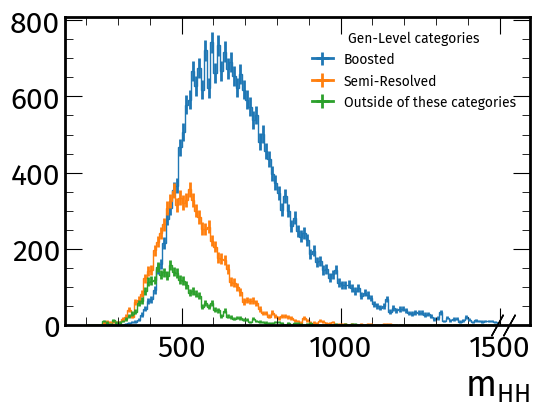

In [11]:
# calcualte m_HH for every event
mhh = (gen_higgs[:, 0] + gen_higgs[:, 1]).m

# bypass into each category
mhh_boosted = mhh[boosted]
mhh_resolved = mhh[resolved]
mhh_semi = mhh[semi_resolved]
mhh_out = mhh[not_categorized]

# start to plot, code modified on Christina's plot_h1h2_fj
bins = np.arange(200, 1500, 10)
var_axis = hist.axis.Variable(bins, name="var", label="variable")
cat_axis = hist.axis.StrCategory([], name="cat", growth=True)

hist_mhh = hist.Hist(var_axis, cat_axis)
hist_mhh.fill(var=mhh_boosted, cat="boosted")
hist_mhh.fill(var=mhh_semi, cat="semi_resolved")
hist_mhh.fill(var=mhh_resolved, cat="resolved")
hist_mhh.fill(var=mhh_out, cat="non-categorized")

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
mplhep.histplot(hist_mhh[{"cat": "boosted"}], ax=ax, label="Boosted")
#mplhep.histplot(hist_mhh[{"cat": "resolved"}], ax=ax, label="Resolved")
mplhep.histplot(hist_mhh[{"cat": "semi_resolved"}], ax=ax, label="Semi-Resolved")
mplhep.histplot(hist_mhh[{"cat": "non-categorized"}], ax=ax, label="Outside of these categories")
leg = ax.legend(fontsize=10)
leg.set_title("Gen-Level categories", prop={"size": 10})
ax.set_xlabel(r"$m_{HH}$")
plt.show()

In [12]:
from hist.intervals import clopper_pearson_interval

hh_axis = hist.axis.Regular(20, 250, 1000, name="hh_mass", label="HH Reco Mass [GeV]")
hh_gen_axis = hist.axis.Regular(20, 250, 1000, name="hh_mass", label="HH Gen Mass [GeV]")

first_bb_j1 = jets_outside[:, 0]
first_bb_j2 = jets_outside[:, 1]
ak4pair_dijet = first_bb_j1 + first_bb_j2

fatjet = fatjets[:, 0]

h1 = gen_higgs[:, 0]
h2 = gen_higgs[:, 1]
# calculate m_HH for every event
mhh_gen = (h1 + h2).m

# mHH from reco
mhh_reco = (ak4pair_dijet + fatjet).m

# match selected ak4 dijet pair to H
ak4drH1b1 = ak4pair_dijet.deltaR(gen_bs[:, 0])
ak4drH1b2 = ak4pair_dijet.deltaR(gen_bs[:, 1])
ak4drH2b1 = ak4pair_dijet.deltaR(gen_bs[:, 2])
ak4drH2b2 = ak4pair_dijet.deltaR(gen_bs[:, 3])
ak4drH = np.stack([ak4drH1b1, ak4drH1b2, ak4drH2b1, ak4drH2b2], axis=1)
ak4Hindex = np.floor(np.argmin(ak4drH, axis=-1) / 2)

# match selected ak4 jets to H
ak40drH1b1 = first_bb_j1.deltaR(gen_bs[:, 0])
ak40drH1b2 = first_bb_j1.deltaR(gen_bs[:, 1])
ak40drH2b1 = first_bb_j1.deltaR(gen_bs[:, 2])
ak40drH2b2 = first_bb_j1.deltaR(gen_bs[:, 3])
ak40drH = np.stack([ak40drH1b1, ak40drH1b2, ak40drH2b1, ak40drH2b2], axis=1)
ak40Hindex = np.floor(np.argmin(ak40drH, axis=-1) / 2)
ak41drH1b1 = first_bb_j2.deltaR(gen_bs[:, 0])
ak41drH1b2 = first_bb_j2.deltaR(gen_bs[:, 1])
ak41drH2b1 = first_bb_j2.deltaR(gen_bs[:, 2])
ak41drH2b2 = first_bb_j2.deltaR(gen_bs[:, 3])
ak41drH = np.stack([ak41drH1b1, ak41drH1b2, ak41drH2b1, ak41drH2b2], axis=1)
ak41Hindex = np.floor(np.argmin(ak40drH, axis=-1) / 2)

# match selected ak8 jets to H
ak8drH1 = fatjet.deltaR(h1)
ak8drH2 = fatjet.deltaR(h2)
ak8drH = np.stack([ak8drH1, ak8drH2], axis=1)
ak8Hindex = np.argmin(ak8drH, axis=-1)

# masks
matchedak4 = np.any(ak4drH < 0.4, axis=1)
matchedak8 = np.any(ak8drH < 0.8, axis=1)

# print("index of H with min dr to ak4pair ",ak4Hindex)
print("dr to ak4pair ", ak4drH)
#print("dr to ak4jet0 ", ak40drH)
#print("dr to ak4jet1 ", ak41drH)
matchedak4individual = np.any((ak40drH < 0.4) | (ak41drH < 0.4), axis=1) & (ak40Hindex==ak41Hindex)
# is there any ak4drH > 0.4 even if it is matched otherwise?
print("index0 ", ak40Hindex)
print("index1 ", ak41Hindex)

print("any missing ", np.any(matchedak4individual & ~matchedak4))
matchedak4 = matchedak4individual
matchedboth = matchedak4 & matchedak8

mhh_gen_matched = mhh_gen[matchedboth]
mhh_reco_matched = mhh_reco[matchedboth]

# print("index of H with min dr to ak8 ",ak8Hindex)
print("dr to ak8pair ", ak8drH)

print("matched to ak4 ", matchedak4)
print("matched to ak8 ", matchedak8)
print("events ", np.sum(fatjet.pt>0), len(events))
print("events matched to ak4 ", np.sum(matchedak4)/len(events))
print("events matched to ak8 ", np.sum(matchedak8)/len(events))
print("unmatched ", np.sum(~matchedboth)/len(events))

print("to both ", matchedak4 & matchedak8, np.sum(matchedak4 & matchedak8)/len(events))
print("semi-resolved", matchedak4 & matchedak8, np.sum(matchedak4 & matchedak8 & semi_resolved)/np.sum(semi_resolved))

#print("mhh gen values matched ", mhh_gen[(matchedak4 & matchedak8)], np.sum((matchedak4 & matchedak8)))
#print("mhh reco values matched ", mhh_reco[(matchedak4 & matchedak8)])
#print("mhh gen values unmatched ", mhh_gen[~(matchedak4 & matchedak8)], np.sum(~(matchedak4 & matchedak8)))
#print("mhh reco values unmatched ", mhh_reco[~(matchedak4 & matchedak8)])

dr to ak4pair  [[0.51896957 0.64741572 3.19124988 3.32501768]
 [2.86394784 2.69407464 1.20954093 0.11606081]
 [2.19961268 3.03845016 0.16319676 1.22757418]
 ...
 [3.45910372 2.86403714 2.013005   0.05401995]
 [2.4817491  1.56155134 1.82461824 0.469321  ]
 [2.84968906 2.91705585 0.24370689 0.64548394]]
index0  [0. 1. 1. ... 1. 0. 1.]
index1  [0. 1. 1. ... 1. 0. 1.]
any missing  True
dr to ak8pair  [[3.35322892 0.07048186]
 [0.09571513 3.0233534 ]
 [0.0524179  2.62621246]
 ...
 [0.01419379 3.15142305]
 [0.20919982 2.76261303]
 [0.0129396  2.85449626]]
matched to ak4  [ True  True  True ...  True  True  True]
matched to ak8  [ True  True  True ...  True  True  True]
events  38213 38213
events matched to ak4  0.9851359484992018
events matched to ak8  0.9930651872399445
unmatched  0.02177269515609871
to both  [ True  True  True ...  True  True  True] 0.9782273048439013
semi-resolved [ True  True  True ...  True  True  True] 0.9817784256559767


In [13]:
matchedboth.shape

(38213,)

In [14]:
semi_resolved.shape

(38213,)

Text(0, 1, 'Pairing efficiency (semi-resolved)')

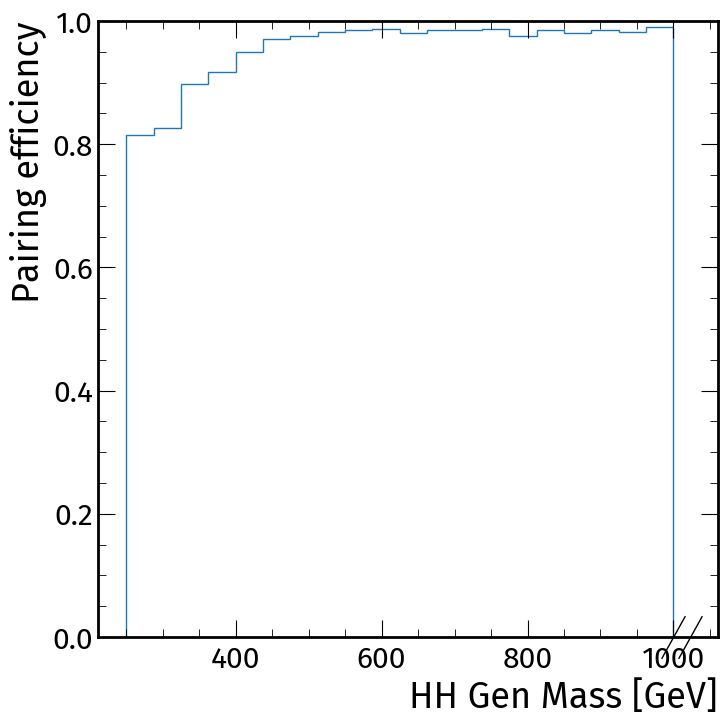

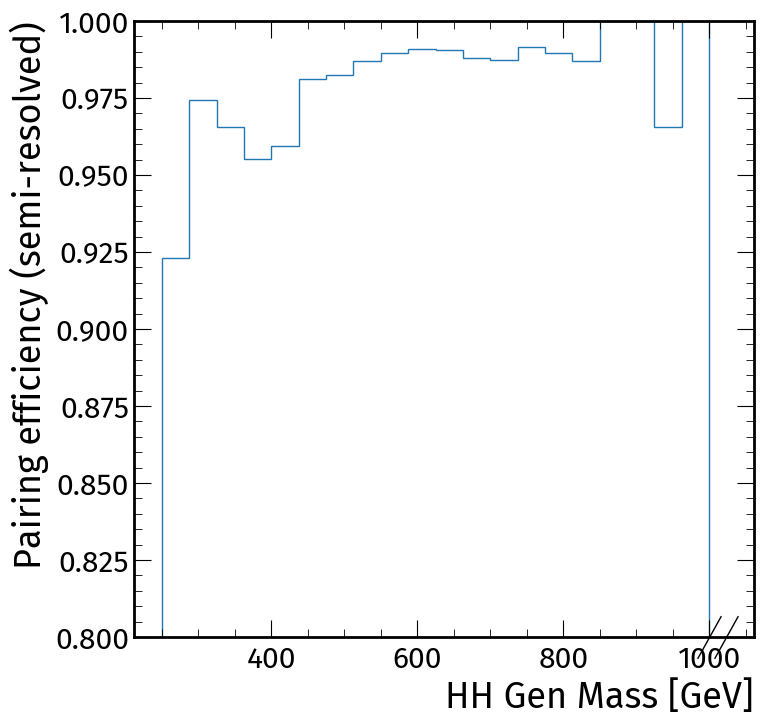

In [15]:

# efficiency: N reconstructed H bosons matched to gen / N reconstructed Higgs bosons
h_num = hist.Hist(hh_gen_axis)
h_num.fill(hh_mass=mhh_gen_matched)

h_denom = hist.Hist(hh_gen_axis)
h_denom.fill(hh_mass=mhh_gen)

efficiency = h_num/h_denom
fig, ax = plt.subplots(figsize=(8, 8))
efficiency.plot1d()
ax.set_ylim(0, 1)
ax.set_ylabel("Pairing efficiency")

h_num = hist.Hist(hh_gen_axis)
h_num.fill(hh_mass=mhh_gen[matchedboth & semi_resolved])

h_denom = hist.Hist(hh_gen_axis)
h_denom.fill(hh_mass=mhh_gen[semi_resolved])

efficiency = h_num/h_denom
fig, ax = plt.subplots(figsize=(8, 8))
efficiency.plot1d()
ax.set_ylim(0.8, 1)
ax.set_ylabel("Pairing efficiency (semi-resolved)")



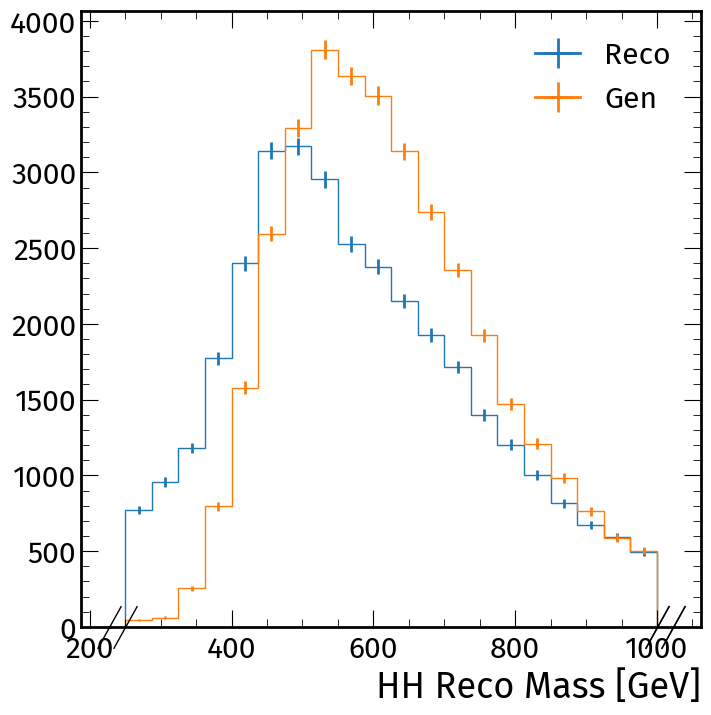

In [16]:

h_num = hist.Hist(hh_gen_axis)
h_num.fill(hh_mass=mhh_gen_matched)

h_reco = hist.Hist(hh_axis)
h_reco.fill(hh_mass=mhh_reco_matched)

fig, ax = plt.subplots(figsize=(8, 8))
h_reco.plot1d(ax=ax, label='Reco')
h_num.plot1d(ax=ax, label='Gen')
ax.legend()

In [17]:

def get_efficiency(ak4pair_0, ak4pair_1, fatjet, label):
    h1 = gen_higgs[:, 0]
    h2 = gen_higgs[:, 1]
    # calculate m_HH for every event
    mhh_gen = (h1 + h2).m

    # mHH from reco
    mhh_reco = (ak4pair_0 + ak4pair_1 + fatjet).m

    # match selected ak4 jets to H
    ak40drH1b1 = ak4pair_0.deltaR(gen_bs[:, 0])
    ak40drH1b2 = ak4pair_0.deltaR(gen_bs[:, 1])
    ak40drH2b1 = ak4pair_0.deltaR(gen_bs[:, 2])
    ak40drH2b2 = ak4pair_0.deltaR(gen_bs[:, 3])
    ak40drH = np.stack([ak40drH1b1, ak40drH1b2, ak40drH2b1, ak40drH2b2], axis=1)
    ak40Hindex = np.floor(np.argmin(ak40drH, axis=-1) / 2)

    ak41drH1b1 = ak4pair_1.deltaR(gen_bs[:, 0])
    ak41drH1b2 = ak4pair_1.deltaR(gen_bs[:, 1])
    ak41drH2b1 = ak4pair_1.deltaR(gen_bs[:, 2])
    ak41drH2b2 = ak4pair_1.deltaR(gen_bs[:, 3])
    ak41drH = np.stack([ak41drH1b1, ak41drH1b2, ak41drH2b1, ak41drH2b2], axis=1)
    ak41Hindex = np.floor(np.argmin(ak40drH, axis=-1) / 2)

    # match selected ak8 jets to H
    ak8drH1 = fatjet.deltaR(h1)
    ak8drH2 = fatjet.deltaR(h2)
    ak8drH = np.stack([ak8drH1, ak8drH2], axis=1)
    ak8Hindex = np.argmin(ak8drH, axis=-1)

    # masks
    matchedak4 = np.any((ak40drH < 0.4) | (ak41drH < 0.4), axis=1) & (ak40Hindex==ak41Hindex)
    matchedak8 = np.any(ak8drH < 0.8, axis=1)

    mhh_gen_matched = mhh_gen[matchedak4 & matchedak8]
    mhh_reco_matched = mhh_reco[matchedak4 & matchedak8]
    print("unmatched ", np.sum(~matchedboth)/len(events))
    print("to both ", matchedak4 & matchedak8, np.sum(matchedak4 & matchedak8)/len(events))
    print("semi-resolved", matchedak4 & matchedak8, np.sum(matchedak4 & matchedak8 & semi_resolved)/np.sum(semi_resolved))

    # calculate efficiency of reconstruction
    h_num = hist.Hist(hh_gen_axis)
    h_num.fill(hh_mass=mhh_gen_matched)

    h_denom = hist.Hist(hh_gen_axis)
    h_denom.fill(hh_mass=mhh_gen)

    efficiency = h_num/h_denom
    efficiency_yerr = abs(clopper_pearson_interval(h_num.view(), h_denom.view())- h_num.view() / h_denom.view())

    return efficiency, efficiency_yerr, mhh_gen_matched, mhh_reco_matched

### Pairing with 2 ak4 jets with highest b-jet score
- 2 jets outside the FatJet
- with highest b-jet score

unmatched  0.02177269515609871
to both  [ True  True  True ...  True  True  True] 0.9782273048439013
semi-resolved [ True  True  True ...  True  True  True] 0.9817784256559767


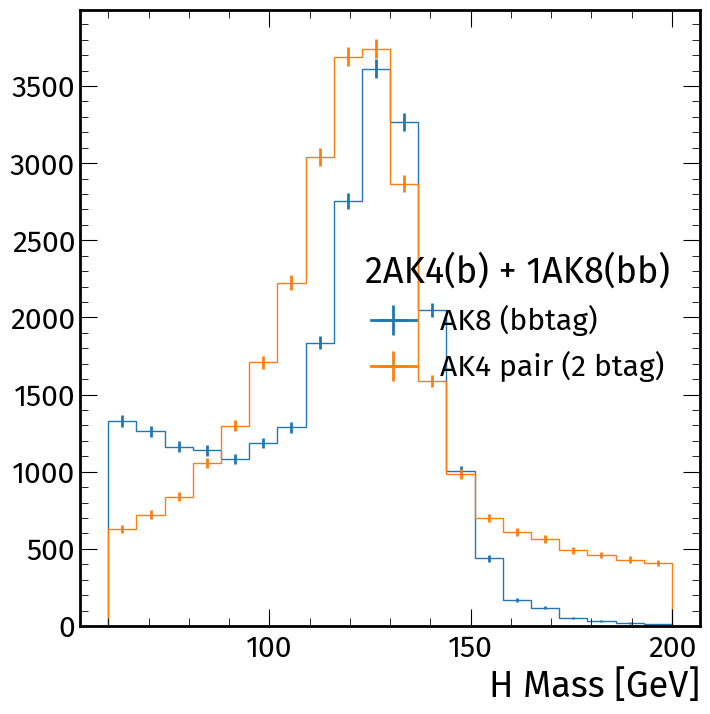

In [18]:
first_bb_j1 = jets_outside[:, 0]
first_bb_j2 = jets_outside[:, 1]
first_bb_dijet = first_bb_j1 + first_bb_j2

fatjet_0 = fatjets[:, 0]

get_mass_resolution(first_bb_dijet, fatjet_0, "2 btag", "bbtag", "2AK4(b) + 1AK8(bb)")
efficiency_0, efficiency_yerr_0, mhh_gen_0, mhh_reco_0 = get_efficiency(first_bb_j1, first_bb_j2, fatjet_0, label="2AK4(b) + 1AK8(bb)")

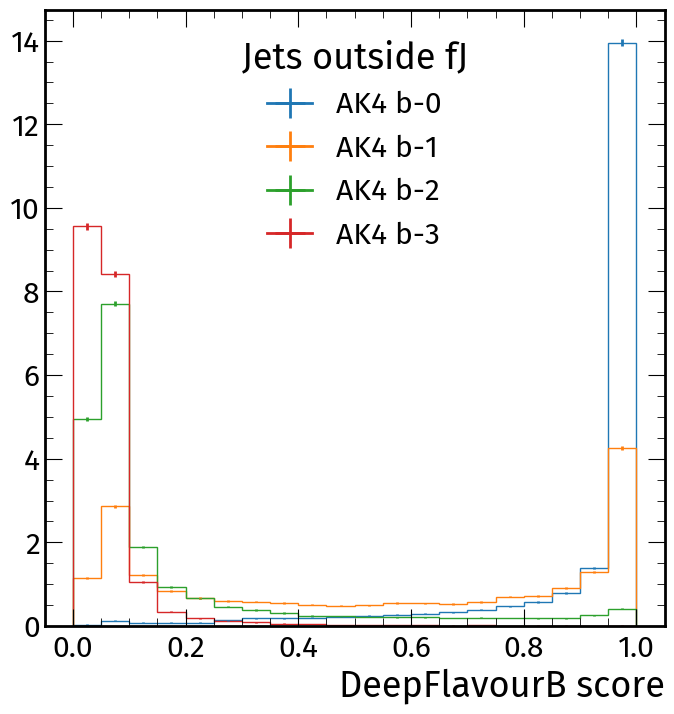

In [19]:
# plot b-tagging score of all ak4 jets outside
b_outside = events.ak4JetOutsidebtagDeepFlavB.to_numpy()

btag_axis = hist.axis.Regular(20, 0, 1, name="btag", label="DeepFlavourB score")
jet_axis = hist.axis.StrCategory([], name="jet", growth=True)

h = hist.Hist(btag_axis, jet_axis)
h.fill(btag=b_outside[:, 0], jet="0")
h.fill(btag=b_outside[:, 1], jet="1")
h.fill(btag=b_outside[:, 2], jet="2")
h.fill(btag=b_outside[:, 3], jet="3")

fig, ax = plt.subplots(figsize=(8, 8))
h[{"jet": "0"}].plot1d(label=f"AK4 b-0", ax=ax, density=True, flow="none")
h[{"jet": "1"}].plot1d(label=f"AK4 b-1", ax=ax, density=True, flow="none")
h[{"jet": "2"}].plot1d(label=f"AK4 b-2", ax=ax, density=True, flow="none")
h[{"jet": "3"}].plot1d(label=f"AK4 b-3", ax=ax, density=True, flow="none")
ax.legend(title="Jets outside fJ")

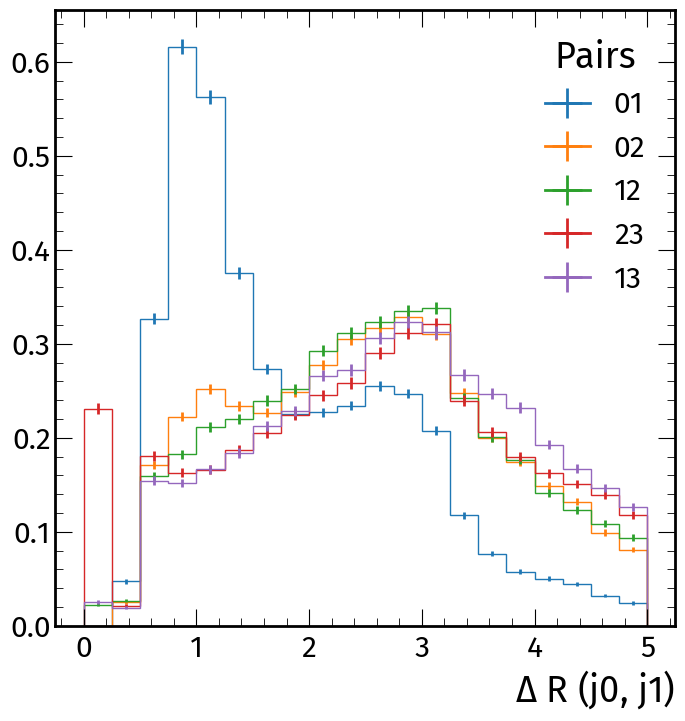

In [20]:
# plot dr between chosen jets
deltar_axis = hist.axis.Regular(20, 0, 5, name="deltar", label=r"$\Delta$ R (j0, j1)")
jet_axis = hist.axis.StrCategory([], name="jet_choice", growth=True)

h = hist.Hist(deltar_axis, jet_axis)
h.fill(deltar=jets_outside[:, 0].deltaR(jets_outside[:, 1]), jet_choice="01")
h.fill(deltar=jets_outside[:, 0].deltaR(jets_outside[:, 2]), jet_choice="02")
h.fill(deltar=jets_outside[:, 1].deltaR(jets_outside[:, 2]), jet_choice="12")
h.fill(deltar=jets_outside[:, 2].deltaR(jets_outside[:, 3]), jet_choice="23")
h.fill(deltar=jets_outside[:, 1].deltaR(jets_outside[:, 3]), jet_choice="13")


fig, ax = plt.subplots(figsize=(8, 8))
h.plot1d(flow='none', density=True)
ax.legend(title=r"Pairs")

### Pairing with 2 ak4 jets with min dHH and max dR to fj
- Using 4 ak4 jets (not outside of the jet) compute pairs that satisfy min dHH
- Order pairs by min dR to candidate fj

unmatched  0.02177269515609871
to both  [ True  True  True ...  True  True  True] 0.9402297647397483
semi-resolved [ True  True  True ...  True  True  True] 0.940354713313897


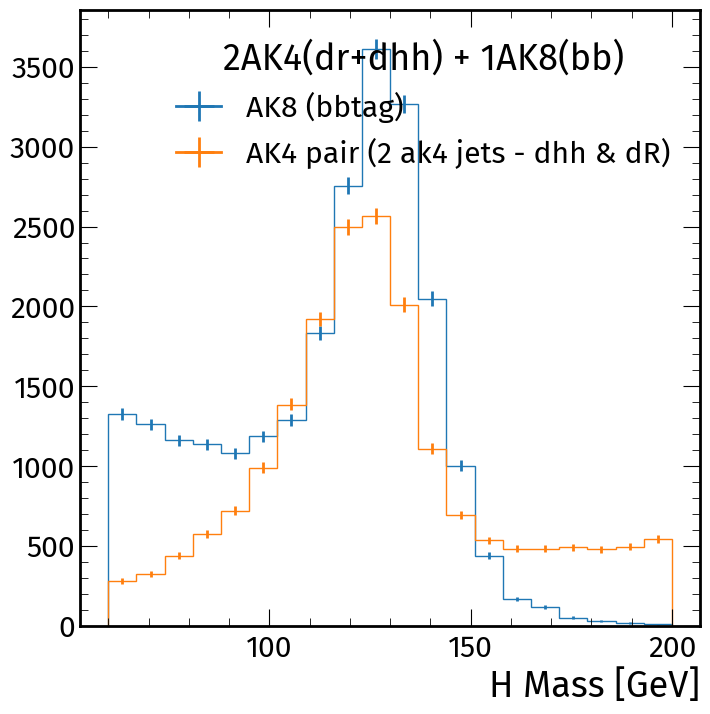

In [21]:
first_bb_pair = events.ak4JetPair0.to_numpy()
second_bb_pair = events.ak4JetPair1.to_numpy()

first_bb_j1 = jets[np.arange(len(jets.pt)), first_bb_pair[:, 0]]
first_bb_j2 = jets[np.arange(len(jets.pt)), first_bb_pair[:, 1]]
first_bb_dijet = first_bb_j1 + first_bb_j2

second_bb_j1 = jets[np.arange(len(jets.pt)), second_bb_pair[:, 0]]
second_bb_j2 = jets[np.arange(len(jets.pt)), second_bb_pair[:, 1]]
second_bb_dijet = second_bb_j1 + second_bb_j2

fatjet_0 = fatjets[:, 0]

get_mass_resolution(first_bb_dijet, fatjet_0, "2 ak4 jets - dhh & dR", "bbtag", "2AK4(dr+dhh) + 1AK8(bb)")
efficiency_1, efficiency_yerr_1, mhh_gen_1, mhh_reco_1  = get_efficiency(first_bb_j1, first_bb_j2, fatjet_0, label="2AK4(dr+dhh) + 1AK8(bb)")

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fa5f838f670>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

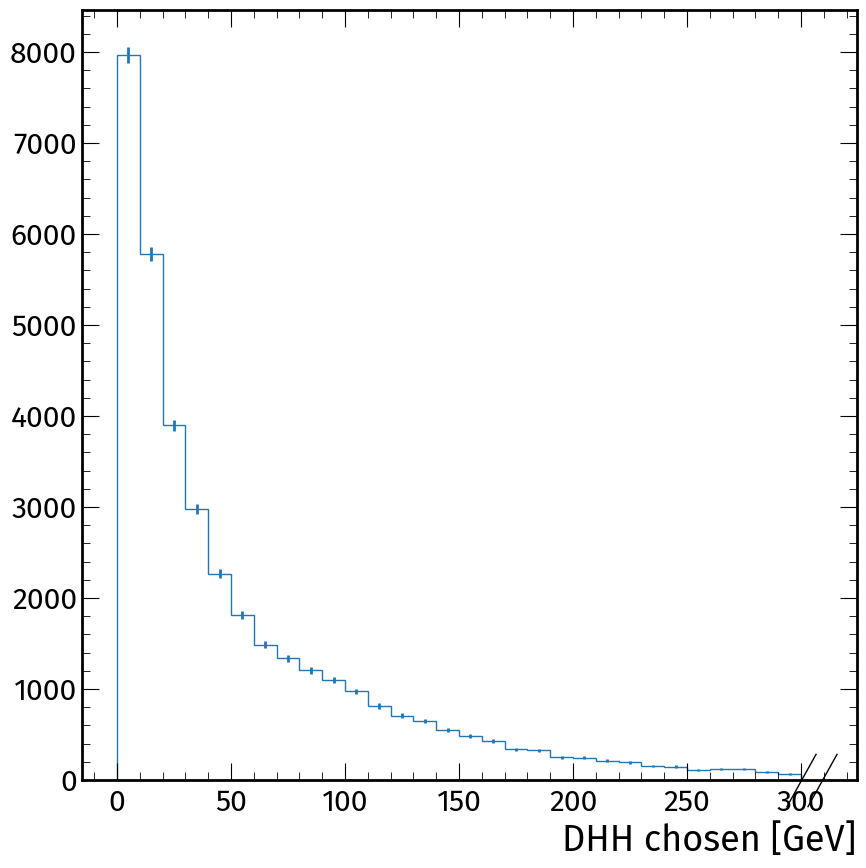

In [22]:
k = 125 / 120
delta_d0 = np.absolute(first_bb_dijet.mass - k * second_bb_dijet.mass) / np.sqrt(1 + k**2)
dhh_axis = hist.axis.Regular(30, 0, 300, name="dhh", label=r"DHH chosen [GeV]")
h = hist.Hist(dhh_axis)
h.fill(dhh=delta_d0).plot1d()

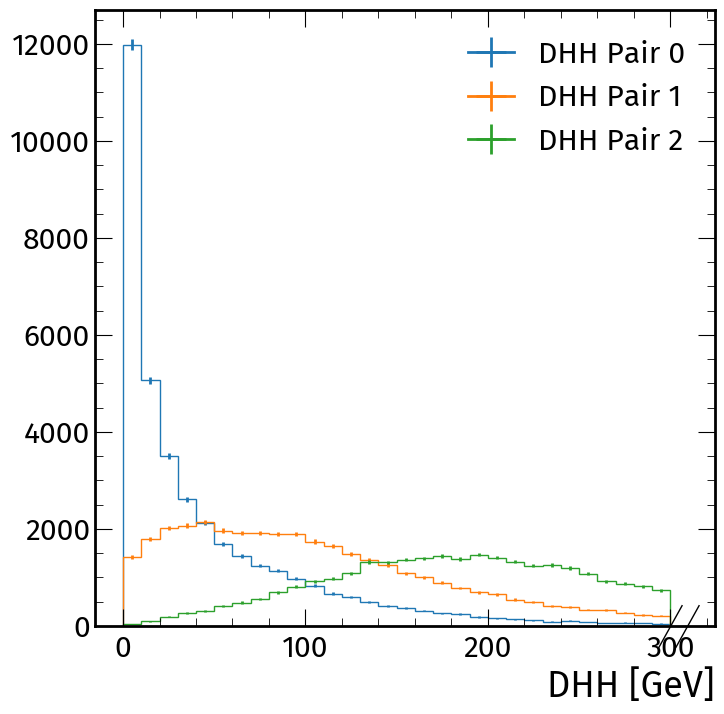

In [23]:
# repeat the method just to cross check
import itertools

# compute possible jet assignments lookup table
MIN_JETS = 4
MAX_JETS = 4
HIGGS_MASS = 125.0
JET_ASSIGNMENTS = {}
for nj in range(MIN_JETS, MAX_JETS + 1):
    a = list(itertools.combinations(range(nj), 2))
    b = np.array([(i, j) for i, j in itertools.combinations(a, 2) if len(set(i + j)) == MIN_JETS])
    JET_ASSIGNMENTS[nj] = b

# just consider top 4 jets (already sorted by b-jet score)
nj = 4
jets_assign = jets[:, 0:4]

jj = jets_assign[:, JET_ASSIGNMENTS[nj][:, :, 0]] + jets[:, JET_ASSIGNMENTS[nj][:, :, 1]]
mjj = jj.M
mjj_sorted = -np.sort(-mjj)
k = 125 / 120
delta_d = np.absolute(mjj_sorted[:, :, 0] - k * mjj_sorted[:, :, 1]) / np.sqrt(1 + k**2)
index_mindhh = np.argmin(delta_d, axis=-1)

d_sorted = -np.sort(-delta_d)
is_dhh_tooclose = (d_sorted[:, 0] - d_sorted[:, 1]) < 30
cm = jj[:, :, 0] + jj[:, :, 1]
com_pt = jj[:, :, 0].boostCM_of(cm).pt + jj[:, :, 1].boostCM_of(cm).pt
index_max_com_pt = np.argmax(com_pt, axis=-1)
index = np.where(is_dhh_tooclose, index_max_com_pt, index_mindhh)

dhh_axis = hist.axis.Regular(30, 0, 300, name="dhh", label=r"DHH [GeV]")
h = hist.Hist(dhh_axis, pair_axis)
h.fill(dhh=d_sorted[:, 2], pair="DHH Pair 0")
h.fill(dhh=d_sorted[:, 1], pair="DHH Pair 1")
h.fill(dhh=d_sorted[:, 0], pair="DHH Pair 2")

fig, ax = plt.subplots(figsize=(8, 8))
h.plot1d(ax=ax)
ax.legend()

In [24]:
d_sorted

array([[178.1473773 ,  81.53726553,   1.49269209],
       [258.45101124, 137.68674092, 114.76898688],
       [404.30601484, 228.21202081,  80.60983848],
       ...,
       [139.39279123,  25.62881473,  16.3405406 ],
       [170.31336747, 111.07988172,  56.6733371 ],
       [153.52501244, 112.2299058 ,  41.68454532]])

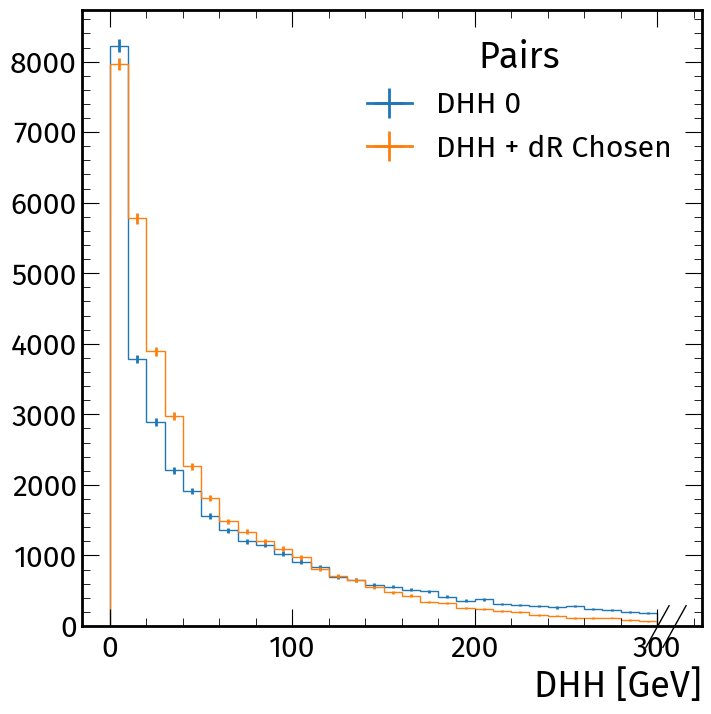

In [25]:
h = hist.Hist(dhh_axis, pair_axis)
h.fill(dhh=delta_d[:, 2], pair="DHH 0")
h.fill(dhh=delta_d0, pair="DHH + dR Chosen")

fig, ax = plt.subplots(figsize=(8, 8))
h.plot1d(ax=ax)
ax.legend(title="Pairs")

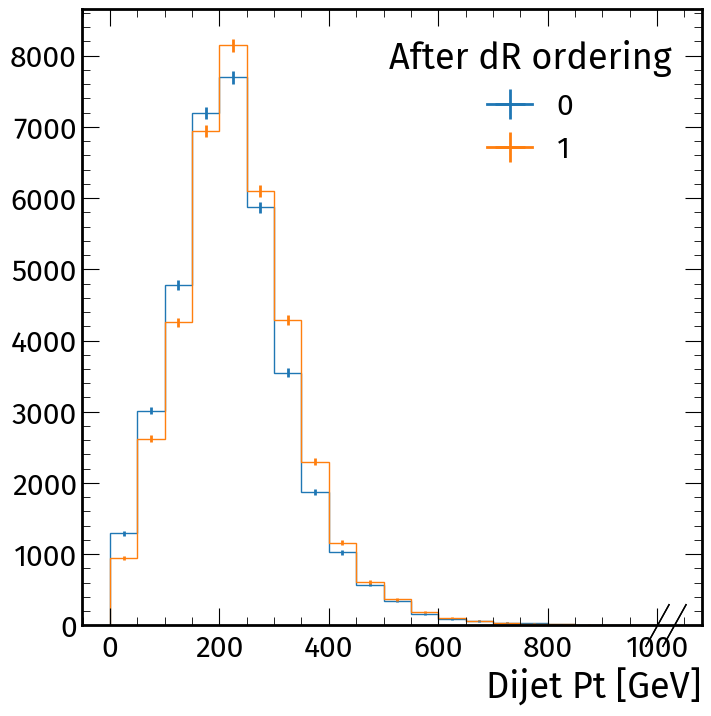

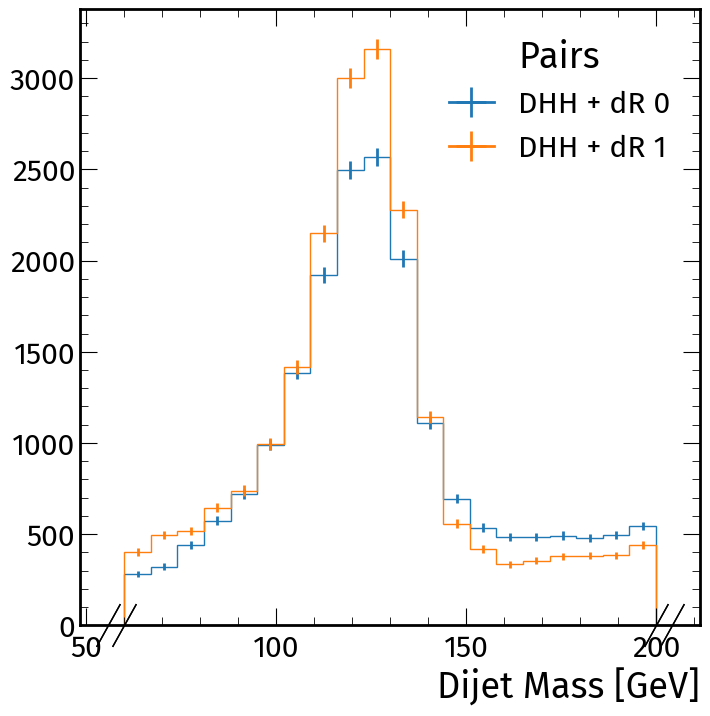

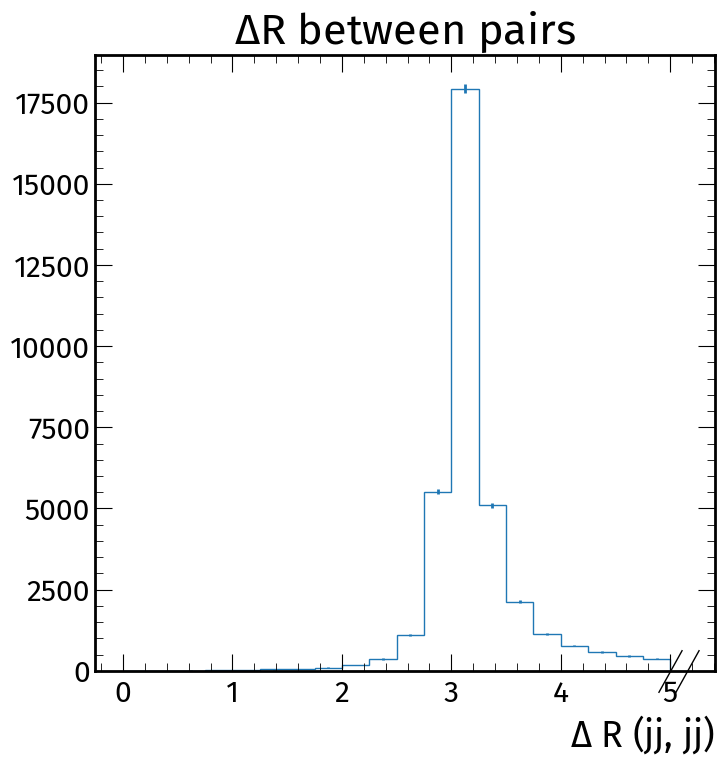

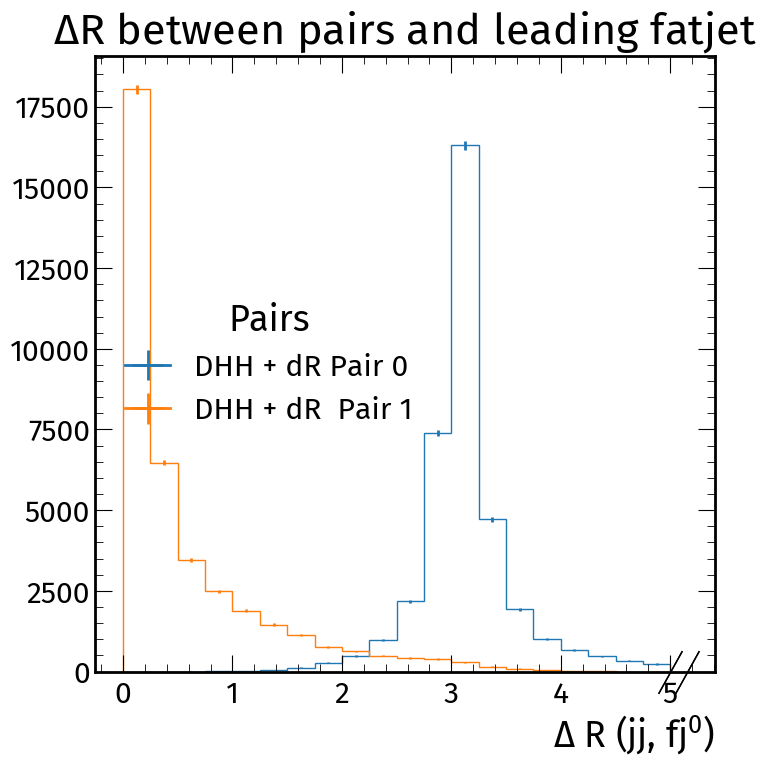

In [26]:
# verify that indeed these pairs have min dr
dijet_pt_axis = hist.axis.Regular(20, 0, 1000, name="dijet_pt", label="Dijet Pt [GeV]")
pair_axis = hist.axis.StrCategory([], name="pair", growth=True)

h = hist.Hist(dijet_pt_axis, pair_axis)
h.fill(dijet_pt=first_bb_dijet.pt, pair="0")
h.fill(dijet_pt=second_bb_dijet.pt, pair="1")

fig, ax = plt.subplots(figsize=(8, 8))
h[{"pair": "0"}].plot1d(label="0", ax=ax)
h[{"pair": "1"}].plot1d(label="1", ax=ax)
ax.legend(title="After dR ordering")

dijet_mass_axis = hist.axis.Regular(20, 60, 200, name="dijet_mass", label="Dijet Mass [GeV]")

h = hist.Hist(dijet_mass_axis, pair_axis)
h.fill(dijet_mass=first_bb_dijet.mass, pair="0")
h.fill(dijet_mass=second_bb_dijet.mass, pair="1")

fig, ax = plt.subplots(figsize=(8, 8))
h[{"pair": "0"}].plot1d(label="DHH + dR 0", ax=ax)
h[{"pair": "1"}].plot1d(label="DHH + dR 1", ax=ax)
ax.legend(title="Pairs")

# deltar between pairs
deltar_axis = hist.axis.Regular(20, 0, 5, name="deltar", label=r"$\Delta$ R (jj, jj)")
h = hist.Hist(deltar_axis)
h.fill(deltar=first_bb_dijet.deltaR(second_bb_dijet))

fig, ax = plt.subplots(figsize=(8, 8))
h.plot1d()
ax.set_title(r"$\Delta R$ between pairs")

deltar_axis = hist.axis.Regular(20, 0, 5, name="deltar", label=r"$\Delta$ R (jj, fj$^0$)")
h = hist.Hist(deltar_axis, pair_axis)
h.fill(deltar=first_bb_dijet.deltaR(fatjet_0), pair="0")
h.fill(deltar=second_bb_dijet.deltaR(fatjet_0), pair="1")

fig, ax = plt.subplots(figsize=(8, 8))
h[{"pair": 0}].plot1d(label="DHH + dR Pair 0", ax=ax)
h[{"pair": 1}].plot1d(label="DHH + dR  Pair 1", ax=ax)
ax.set_title(r"$\Delta R$ between pairs and leading fatjet")
ax.legend(title="Pairs")

### Pairing with min chi2 to HH using ak4Jets outside the jet


unmatched  0.02177269515609871
to both  [ True  True  True ...  True  True  True] 0.9635987752858974
semi-resolved [ True  True  True ...  True  True  True] 0.9698736637512148


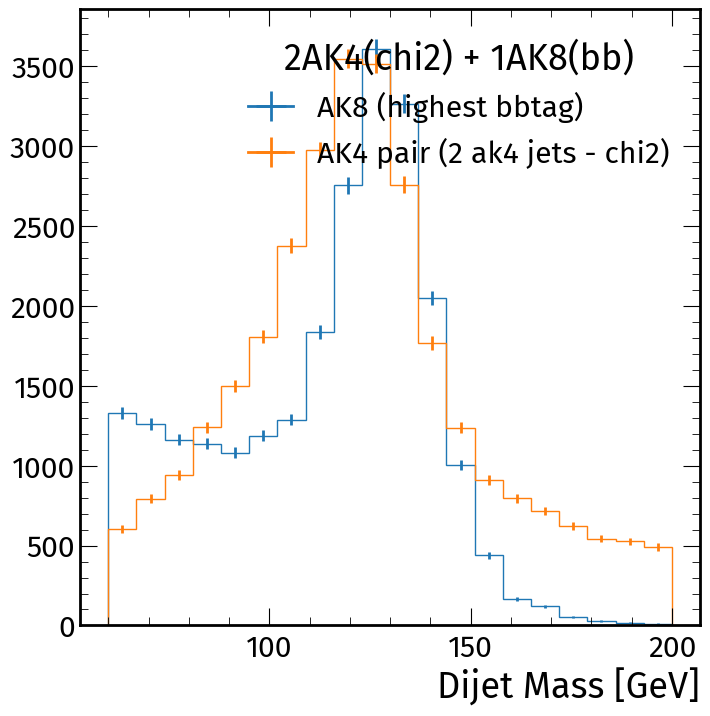

In [27]:
first_bb_pair = events.ak4Pair0chi2.to_numpy()
second_bb_pair = events.ak4Pair1chi2.to_numpy()


first_bb_j1 = jets_outside[np.arange(len(jets_outside.pt)), first_bb_pair[:, 0]]
first_bb_j2 = jets_outside[np.arange(len(jets_outside.pt)), first_bb_pair[:, 1]]
first_bb_dijet = first_bb_j1 + first_bb_j2

second_bb_j1 = jets_outside[np.arange(len(jets_outside.pt)), second_bb_pair[:, 0]]
second_bb_j2 = jets_outside[np.arange(len(jets_outside.pt)), second_bb_pair[:, 1]]
second_bb_dijet = second_bb_j1 + second_bb_j2


fatjet_0 = fatjets[:, 0]

get_mass_resolution(first_bb_dijet, fatjet_0, "2 ak4 jets - chi2", "highest bbtag", "2AK4(chi2) + 1AK8(bb)")
efficiency_2, efficiency_yerr_2, mhh_gen_2, mhh_reco_2 = get_efficiency(first_bb_j1, first_bb_j2, fatjet_0, label="2AK4(chi2) + 1AK8(bb)")


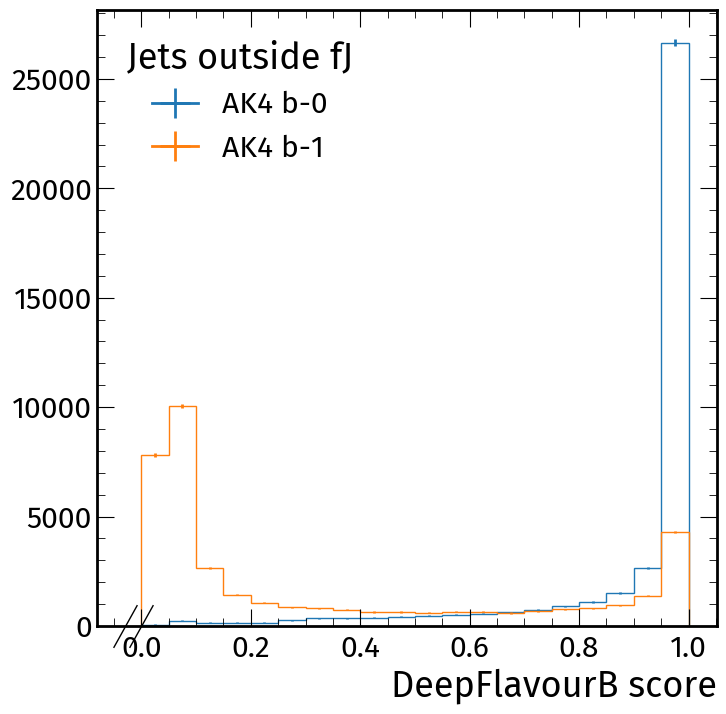

In [28]:
b_outside = events.ak4JetOutsidebtagDeepFlavB.to_numpy()

b_0 = b_outside[np.arange(len(jets_outside.pt)), first_bb_pair[:, 0]]
b_1 = b_outside[np.arange(len(jets_outside.pt)), first_bb_pair[:, 1]]

# plot b-tagging score of chosen ak4 jets
btag_axis = hist.axis.Regular(20, 0, 1, name="btag", label="DeepFlavourB score")
jet_axis = hist.axis.StrCategory([], name="jet", growth=True)

h = hist.Hist(btag_axis, jet_axis)
h.fill(btag=b_0, jet="0")
h.fill(btag=b_1, jet="1")

fig, ax = plt.subplots(figsize=(8, 8))
h[{"jet": "0"}].plot1d(label=f"AK4 b-0", ax=ax)
h[{"jet": "1"}].plot1d(label=f"AK4 b-1", ax=ax)
ax.legend(title="Jets outside fJ")


Text(0.5, 1.0, '$\\Delta R$ between chosen jets')

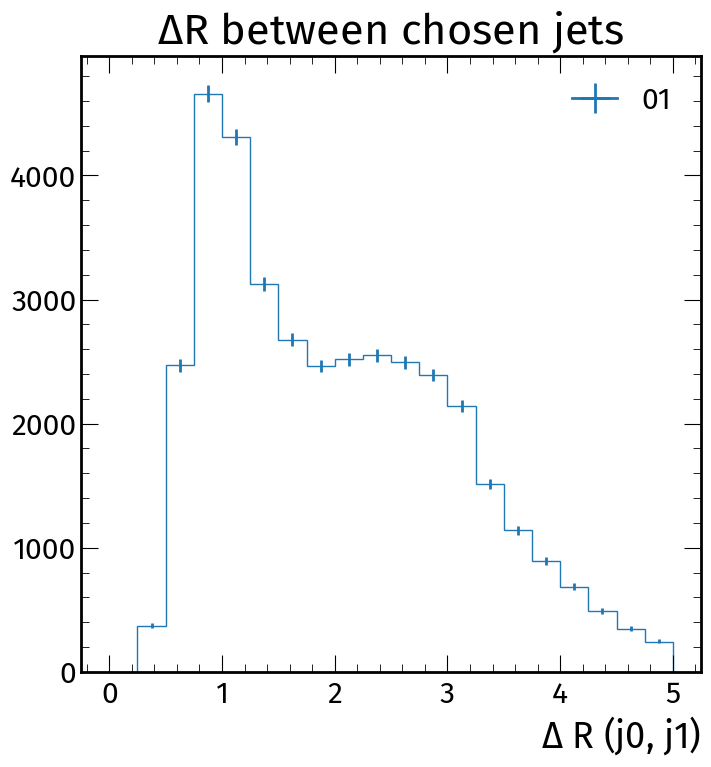

In [29]:
# plot dr between chosen jets
deltar_axis = hist.axis.Regular(20, 0, 5, name="deltar", label=r"$\Delta$ R (j0, j1)")
jet_axis = hist.axis.StrCategory([], name="jet_choice", growth=True)

h = hist.Hist(deltar_axis, jet_axis)
h.fill(deltar=first_bb_j1.deltaR(first_bb_j2), jet_choice="01")


fig, ax = plt.subplots(figsize=(8, 8))
h.plot1d(flow='none')
ax.legend()
ax.set_title(r"$\Delta R$ between chosen jets")

Text(0.5, 1.0, '$\\Delta R$ between chosen jets and fatjet')

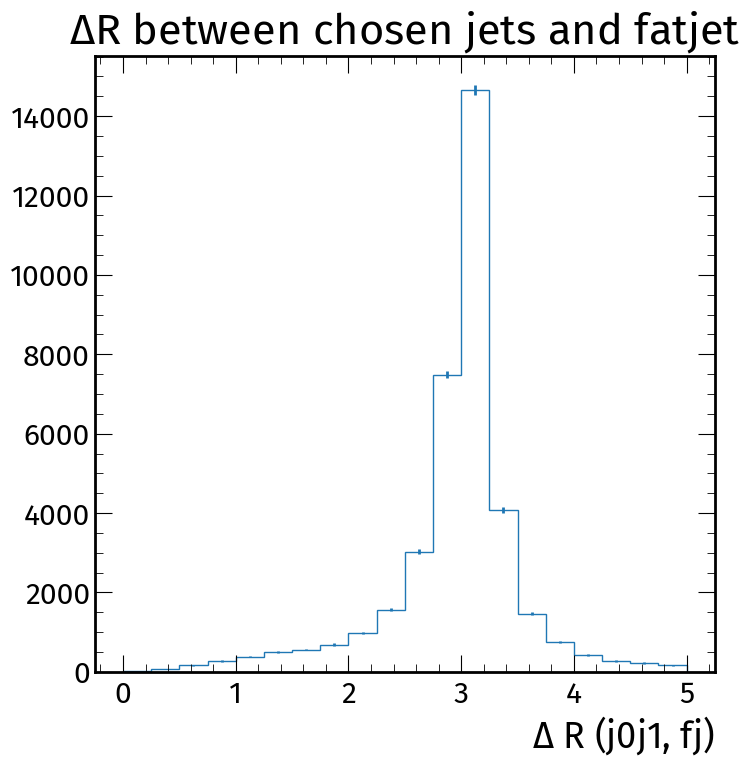

In [30]:
# plot dR with fatjet

deltar_axis = hist.axis.Regular(20, 0, 5, name="deltar", label=r"$\Delta$ R (j0j1, fj)")

h = hist.Hist(deltar_axis)
h.fill(deltar=first_bb_dijet.deltaR(fatjet_0))

fig, ax = plt.subplots(figsize=(8, 8))
h.plot1d(flow='none')
ax.legend()
ax.set_title(r"$\Delta R$ between chosen jets and fatjet")


# Comparing efficiencies and purity

In [31]:
def plot_efficiency(efficiencies, efficiencies_yerr, labels, ltype="Efficiency"):
    fig, ax = plt.subplots(figsize=(8, 8))
    for i, efficiency in enumerate(efficiencies):
        edges, counts = efficiency.to_numpy()
        mplhep.histplot(edges, counts, label=labels[i], yerr=efficiencies_yerr[i])
    ax.set_ylabel(ltype)
    ax.grid()
    ax.set_ylim(0.2,1)
    if ltype == "Efficiency":
        ax.set_xlabel("HH Gen Mass [GeV]")
    else:
        ax.set_xlabel("HH Gen Mass [GeV]")
    ax.legend()

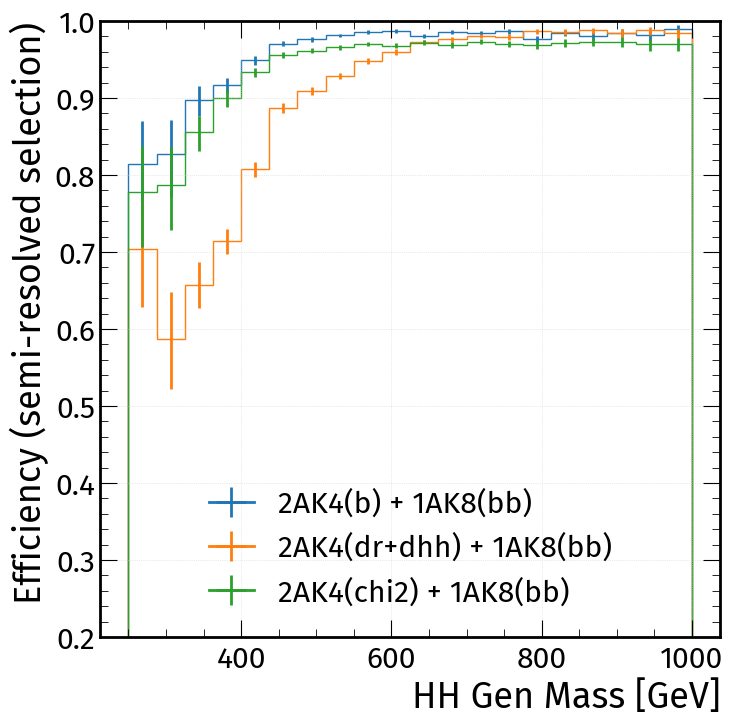

In [32]:
plot_efficiency(
    [efficiency_0, efficiency_1, efficiency_2], 
    [efficiency_yerr_0, efficiency_yerr_1, efficiency_yerr_2], 
    [
        "2AK4(b) + 1AK8(bb)",
        "2AK4(dr+dhh) + 1AK8(bb)",
        "2AK4(chi2) + 1AK8(bb)"
    ],
    ltype="Efficiency (semi-resolved selection)"
)

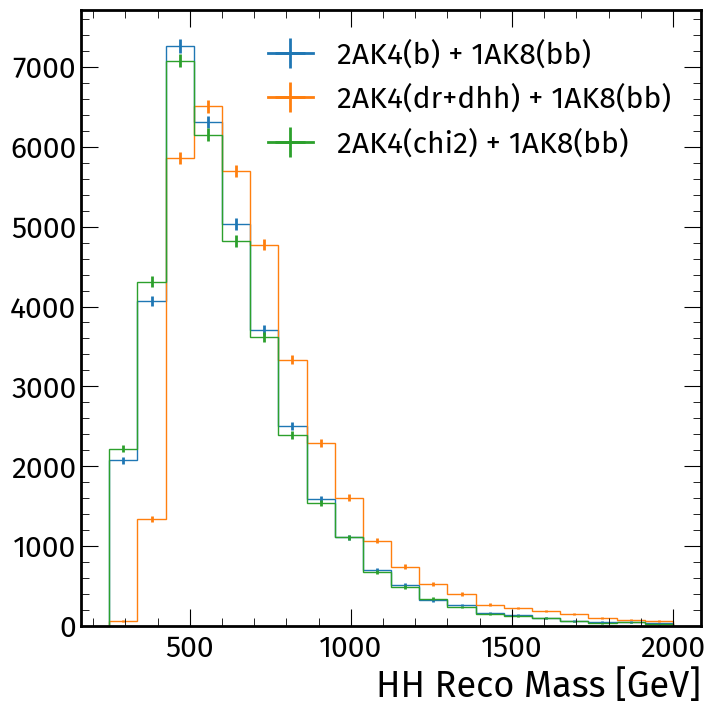

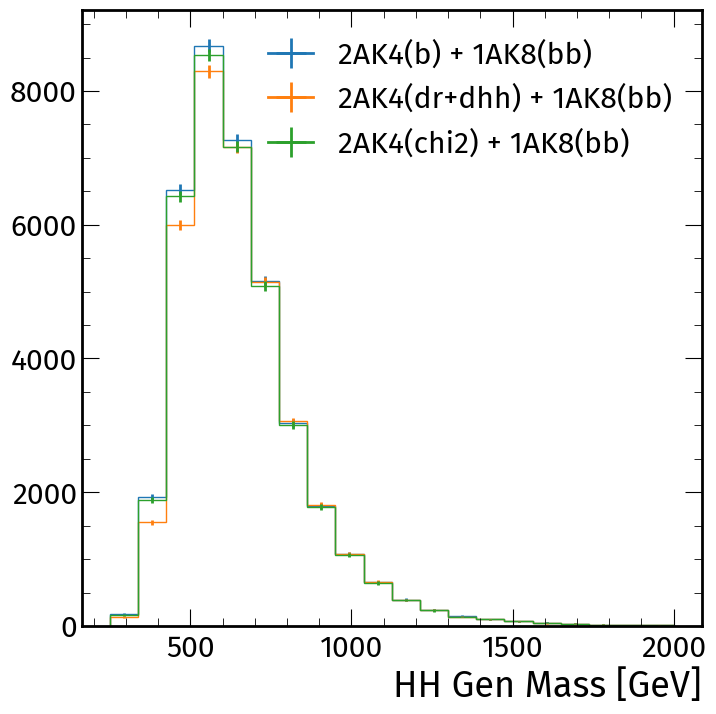

In [33]:
hh_axis = hist.axis.Regular(20, 250, 2000, name="hh_mass", label="HH Reco Mass [GeV]")
hh_gen_axis = hist.axis.Regular(20, 250, 2000, name="hh_mass", label="HH Gen Mass [GeV]")

fig, ax = plt.subplots(figsize=(8, 8))
h = hist.Hist(hh_axis, pair_axis)
h.fill(hh_mass=mhh_reco_0, pair="0")
h.fill(hh_mass=mhh_reco_1, pair="1")
h.fill(hh_mass=mhh_reco_2, pair="2")
mplhep.histplot(h[{"pair":"0"}], ax=ax, label="2AK4(b) + 1AK8(bb)", flow="none")
mplhep.histplot(h[{"pair":"1"}], ax=ax, label="2AK4(dr+dhh) + 1AK8(bb)", flow="none")
mplhep.histplot(h[{"pair":"2"}], ax=ax, label="2AK4(chi2) + 1AK8(bb)", flow="none")
ax.legend()

fig, ax = plt.subplots(figsize=(8, 8))
h = hist.Hist(hh_gen_axis, pair_axis)
h.fill(hh_mass=mhh_gen_0, pair="0")
h.fill(hh_mass=mhh_gen_1, pair="1")
h.fill(hh_mass=mhh_gen_2, pair="2")
mplhep.histplot(h[{"pair":"0"}], ax=ax, label="2AK4(b) + 1AK8(bb)", flow="none")
mplhep.histplot(h[{"pair":"1"}], ax=ax, label="2AK4(dr+dhh) + 1AK8(bb)", flow="none")
mplhep.histplot(h[{"pair":"2"}], ax=ax, label="2AK4(chi2) + 1AK8(bb)", flow="none")
ax.legend()

# Comparing different couplings

In [34]:
events_dict.keys()

dict_keys(['hh4b', 'hh4b-c2p45', 'hh4b-c5', 'hh4b-c0'])

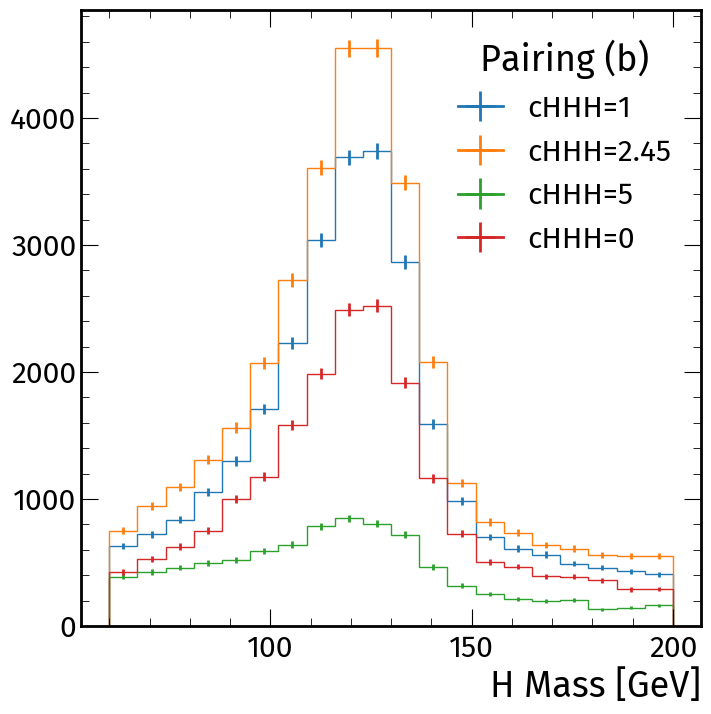

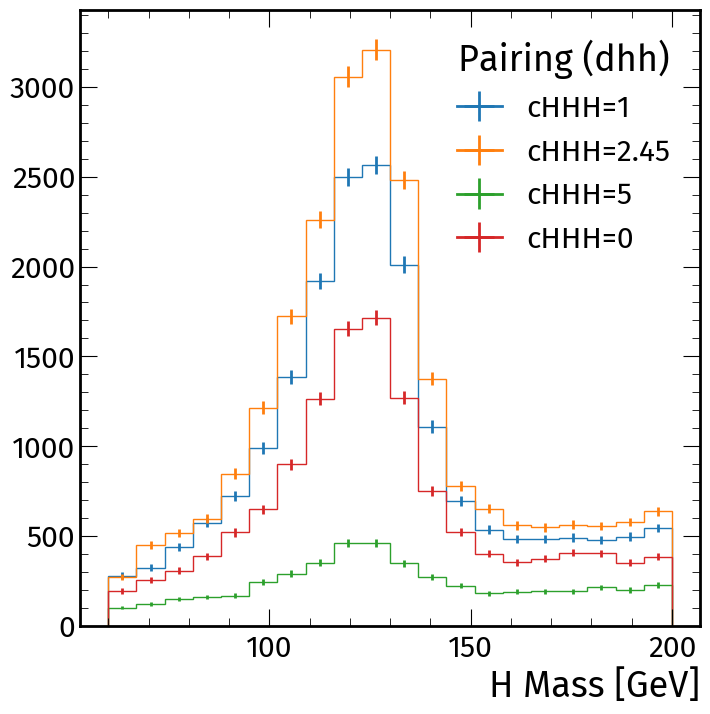

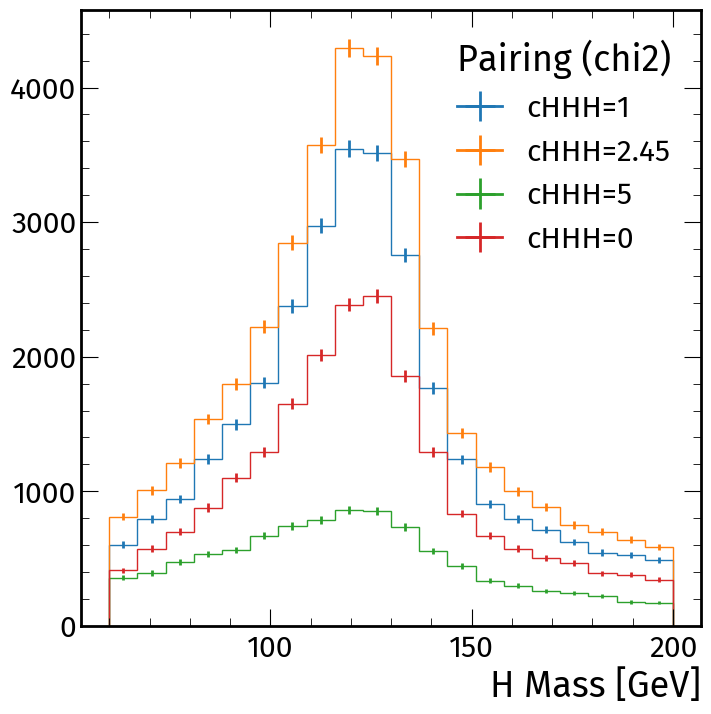

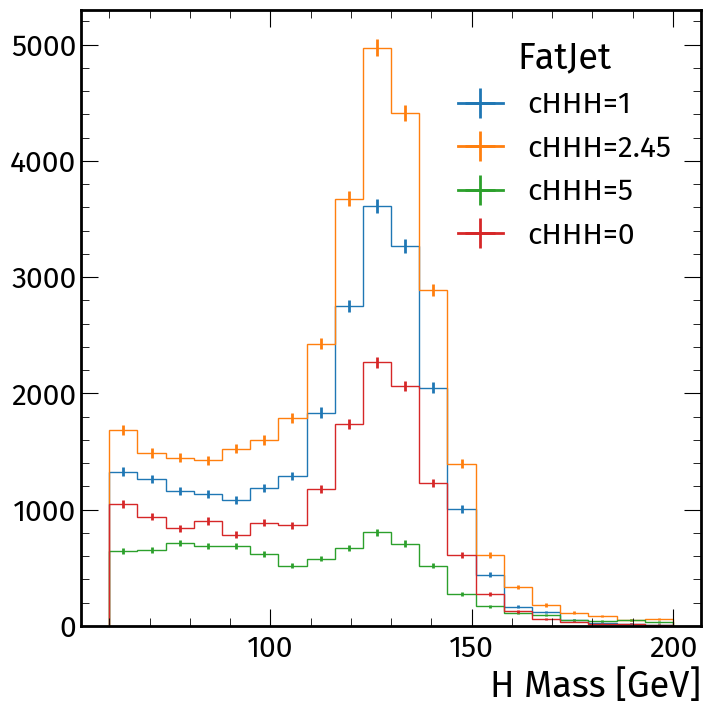

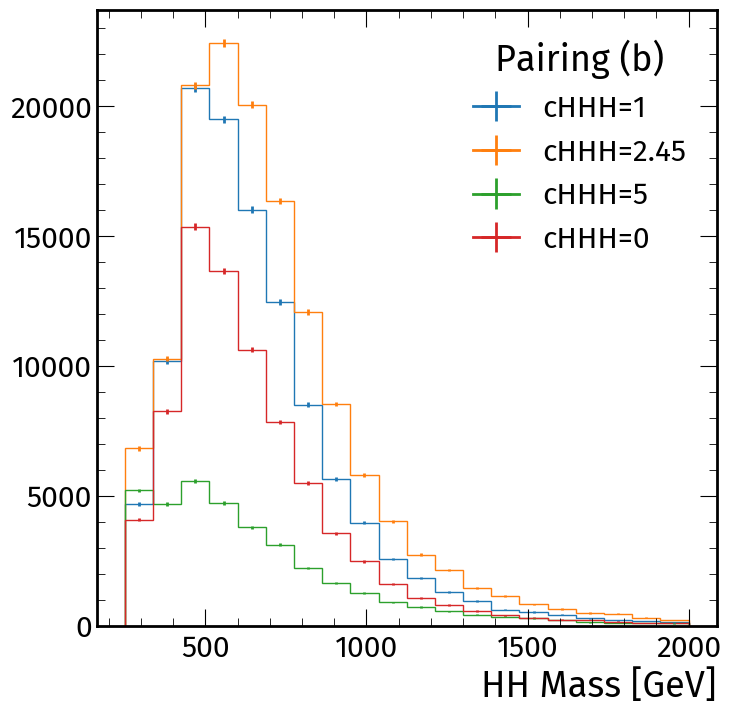

In [37]:
def gen_mask(events):
    # ak4 jets matched to h1 and h2
    h1ak4 = events["ak4JetHiggsMatchIndex"].to_numpy() == 0
    h2ak4 = events["ak4JetHiggsMatchIndex"].to_numpy() == 1
    num_ak4m2h1 = h1ak4.sum(axis=1)
    num_ak4m2h2 = h2ak4.sum(axis=1)
    h1m2ak4 = num_ak4m2h1 == 2
    h2m2ak4 = num_ak4m2h2 == 2

    # ak8 jets matched to h1 and h2
    h1ak8 = events["ak8FatJetHiggsMatchIndex"].to_numpy() == 0
    h2ak8 = events["ak8FatJetHiggsMatchIndex"].to_numpy() == 1
    num_ak8m2h1 = h1ak8.sum(axis=1)
    num_ak8m2h2 = h2ak8.sum(axis=1)
    h1m1ak8 = num_ak8m2h1 == 1
    h2m1ak8 = num_ak8m2h2 == 1

    boosted = h1m1ak8 & h2m1ak8
    semi_resolved_h1 = h1m2ak4 & h2m1ak8 & ~(boosted)
    semi_resolved_h2 = h2m2ak4 & h1m1ak8 & ~(boosted)
    semi_resolved = semi_resolved_h1 | semi_resolved_h2
    resolved = (h1m2ak4 & h2m2ak4) & ~(boosted) & ~(semi_resolved)
    not_categorized = ~(resolved | boosted | semi_resolved)

    return semi_resolved

def get_b(events):
    jets_outside = make_vector(events, "ak4JetOutside")
    first_bb_j1 = jets_outside[:, 0]
    first_bb_j2 = jets_outside[:, 1]
    first_bb_dijet = first_bb_j1 + first_bb_j2
    return first_bb_dijet

def get_fj(events):
    fatjets = make_vector(events, "ak8FatJet")
    return fatjets[:, 0]

def get_dhh(events):
    jets = make_vector(events, "ak4Jet")
    first_bb_pair = events.ak4JetPair0.to_numpy()
    first_bb_j1 = jets[np.arange(len(jets.pt)), first_bb_pair[:, 0]]
    first_bb_j2 = jets[np.arange(len(jets.pt)), first_bb_pair[:, 1]]
    first_bb_dijet = first_bb_j1 + first_bb_j2
    return first_bb_dijet

def get_chi2(events):
    jets_outside = make_vector(events, "ak4JetOutside")
    first_bb_pair = events.ak4Pair0chi2.to_numpy()
    second_bb_pair = events.ak4Pair1chi2.to_numpy()
    first_bb_j1 = jets_outside[np.arange(len(jets_outside.pt)), first_bb_pair[:, 0]]
    first_bb_j2 = jets_outside[np.arange(len(jets_outside.pt)), first_bb_pair[:, 1]]
    first_bb_dijet = first_bb_j1 + first_bb_j2
    return first_bb_dijet

dijet_mass_axis = hist.axis.Regular(20, 60, 200, name="dijet_mass", label="H Mass [GeV]")
pair_axis = hist.axis.StrCategory([], name="pair", growth=True)
sample_axis = hist.axis.StrCategory([], name="sample_name", growth=True)
hh_mass_axis = hist.axis.Regular(20, 250, 2000, name="hh_mass", label="HH Mass [GeV]")

h = hist.Hist(dijet_mass_axis, pair_axis, sample_axis)
h_fj = hist.Hist(dijet_mass_axis, pair_axis, sample_axis)
h_hh = hist.Hist(hh_mass_axis, pair_axis, sample_axis)

for key in events_dict.keys():
    events = events_dict[key]
    semi_resolved = gen_mask(events)
    fatjet = get_fj(events)
    b_pair = get_b(events)
    dhh_pair = get_dhh(events)
    chi2_pair = get_chi2(events)

    h.fill(dijet_mass=b_pair.mass, pair="b", sample_name=key)
    h.fill(dijet_mass=dhh_pair.mass, pair="dhh", sample_name=key)
    h.fill(dijet_mass=chi2_pair.mass, pair="chi2", sample_name=key)

    h_hh.fill(hh_mass=(b_pair+fatjet).mass, pair="b", sample_name=key)
    h_hh.fill(hh_mass=(dhh_pair+fatjet).mass, pair="b", sample_name=key)
    h_hh.fill(hh_mass=(chi2_pair+fatjet).mass, pair="b", sample_name=key)

    h_fj.fill(dijet_mass=fatjet.mass, pair="bb", sample_name=key)

fig, ax = plt.subplots(figsize=(8, 8))
h[{"pair": "b", "sample_name": "hh4b"}].plot1d(label=f"cHHH=1", ax=ax, flow='none')
h[{"pair": "b", "sample_name": "hh4b-c2p45"}].plot1d(label=f"cHHH=2.45", ax=ax, flow='none')
h[{"pair": "b", "sample_name": "hh4b-c5"}].plot1d(label=f"cHHH=5", ax=ax, flow='none')
h[{"pair": "b", "sample_name": "hh4b-c0"}].plot1d(label=f"cHHH=0", ax=ax, flow='none')
ax.legend(title="Pairing (b)")

fig, ax = plt.subplots(figsize=(8, 8))
h[{"pair": "dhh", "sample_name": "hh4b"}].plot1d(label=f"cHHH=1", ax=ax, flow='none')
h[{"pair": "dhh", "sample_name": "hh4b-c2p45"}].plot1d(label=f"cHHH=2.45", ax=ax, flow='none')
h[{"pair": "dhh", "sample_name": "hh4b-c5"}].plot1d(label=f"cHHH=5", ax=ax, flow='none')
h[{"pair": "dhh", "sample_name": "hh4b-c0"}].plot1d(label=f"cHHH=0", ax=ax, flow='none')
ax.legend(title="Pairing (dhh)")

fig, ax = plt.subplots(figsize=(8, 8))
h[{"pair": "chi2", "sample_name": "hh4b"}].plot1d(label=f"cHHH=1", ax=ax, flow='none')
h[{"pair": "chi2", "sample_name": "hh4b-c2p45"}].plot1d(label=f"cHHH=2.45", ax=ax, flow='none')
h[{"pair": "chi2", "sample_name": "hh4b-c5"}].plot1d(label=f"cHHH=5", ax=ax, flow='none')
h[{"pair": "chi2", "sample_name": "hh4b-c0"}].plot1d(label=f"cHHH=0", ax=ax, flow='none')
ax.legend(title="Pairing (chi2)")

fig, ax = plt.subplots(figsize=(8, 8))
h_fj[{"pair": "bb", "sample_name": "hh4b"}].plot1d(label=f"cHHH=1", ax=ax, flow='none')
h_fj[{"pair": "bb", "sample_name": "hh4b-c2p45"}].plot1d(label=f"cHHH=2.45", ax=ax, flow='none')
h_fj[{"pair": "bb", "sample_name": "hh4b-c5"}].plot1d(label=f"cHHH=5", ax=ax, flow='none')
h_fj[{"pair": "bb", "sample_name": "hh4b-c0"}].plot1d(label=f"cHHH=0", ax=ax, flow='none')
ax.legend(title="FatJet")

fig, ax = plt.subplots(figsize=(8, 8))
h_hh[{"pair": "b", "sample_name": "hh4b"}].plot1d(label=f"cHHH=1", ax=ax, flow='none')
h_hh[{"pair": "b", "sample_name": "hh4b-c2p45"}].plot1d(label=f"cHHH=2.45", ax=ax, flow='none')
h_hh[{"pair": "b", "sample_name": "hh4b-c5"}].plot1d(label=f"cHHH=5", ax=ax, flow='none')
h_hh[{"pair": "b", "sample_name": "hh4b-c0"}].plot1d(label=f"cHHH=0", ax=ax, flow='none')
ax.legend(title="Pairing (b)")

## QCD shapes

In [ ]:
# qcd efficiencies
samples = {
    "qcd": [
        "QCD_HT-200to300-13TeV",
        "QCD_HT-300to500-13TeV",
        "QCD_HT-500to700-13TeV",
        "QCD_HT-700to1000-13TeV",
        "QCD_HT-1000to1500-13TeV",
        "QCD_HT-1500to2000-13TeV",
        "QCD_HT-2000toInf-13TeV",
    ],
}

# matching selection
path_to_dir = "/eos/uscms/store/user/cmantill/bbbb/matching/Oct30ApplySelection/"
# no selection
#path_to_dir = "/eos/uscms/store/user/cmantill/bbbb/matching/Oct30/"

dirs = {path_to_dir: samples}
year = "2018"

filters = [
    [
        ("('ak8FatJetPt', '0')", ">=", 300),
        ("('ak8FatJetMsd', '0')", ">=", 60),
        ("('ak8FatJetPNetXbb', '0')", ">=", 0.9734),
        ("('ak8FatJetPNetXbb', '1')", "<", 0.9734),
    ]
]
# uncomment this to not apply any filters (veto very boosted selection)
filters = None


# dictionary that will contain all information (from all samples)
events_dict = {}
for input_dir, samples in dirs.items():
    events_dict = {
        **events_dict,
        # this function will load files (only the columns selected), apply filters and compute a weight per event
        **utils.load_samples(input_dir, samples, year, filters=filters),
    }

samples_loaded = list(events_dict.keys())
keys_loaded = list(events_dict[samples_loaded[0]].keys())
print(f"Keys in events_dict")
for i in keys_loaded: print(i)

Loading QCD_HT-1000to1500-13TeV
Loading QCD_HT-1500to2000-13TeV
Loading QCD_HT-2000toInf-13TeV
Loading QCD_HT-200to300-13TeV
Loading QCD_HT-300to500-13TeV
Loading QCD_HT-500to700-13TeV
Loading QCD_HT-700to1000-13TeV
Keys in events_dict
('ht', 0)
('HLT_PFHT330PT30_QuadPFJet_75_60_45_40_TriplePFBTagDeepCSV_4p5', 0)
('HLT_PFHT1050', 0)
('HLT_PFJet500', 0)
('HLT_AK8PFJet500', 0)
('HLT_AK8PFJet400_TrimMass30', 0)
('HLT_AK8PFHT800_TrimMass50', 0)
('HLT_AK8PFJet330_TrimMass30_PFAK8BoostedDoubleB_np4', 0)
('HLT_QuadPFJet103_88_75_15_DoublePFBTagDeepCSV_1p3_7p7_VBF1', 0)
('HLT_QuadPFJet103_88_75_15_PFBTagDeepCSV_1p3_VBF2', 0)
('HLT_PFHT400_SixPFJet32_DoublePFBTagDeepCSV_2p94', 0)
('HLT_PFHT450_SixPFJet36_PFBTagDeepCSV_1p59', 0)
('HLT_AK8PFJet330_TrimMass30_PFAK8BTagDeepCSV_p17', 0)
('HLT_QuadPFJet98_83_71_15_DoublePFBTagDeepCSV_1p3_7p7_VBF1', 0)
('HLT_QuadPFJet98_83_71_15_PFBTagDeepCSV_1p3_VBF2', 0)
('HLT_PFMET100_PFMHT100_IDTight_CaloBTagDeepCSV_3p1', 0)
('ak4JetbtagDeepFlavB', 0)
('ak4Jetbtag

In [ ]:
dijet_mass_axis = hist.axis.Regular(20, 60, 200, name="dijet_mass", label="H Mass [GeV]")
pair_axis = hist.axis.StrCategory([], name="pair", growth=True)
sample_axis = hist.axis.StrCategory([], name="sample_name", growth=True)

h = hist.Hist(dijet_mass_axis, pair_axis, sample_axis)
h_fj = hist.Hist(dijet_mass_axis, pair_axis, sample_axis)

for key in events_dict.keys():
    events = events_dict[key]
    fatjet = get_fj(events)
    b_pair = get_b(events)
    dhh_pair = get_dhh(events)
    chi2_pair = get_chi2(events)

    h.fill(dijet_mass=b_pair.mass, pair="b", sample_name=key)
    h.fill(dijet_mass=dhh_pair.mass, pair="dhh", sample_name=key)
    h.fill(dijet_mass=chi2_pair.mass, pair="chi2", sample_name=key)

    h_fj.fill(dijet_mass=fatjet.mass, pair="bb", sample_name=key)

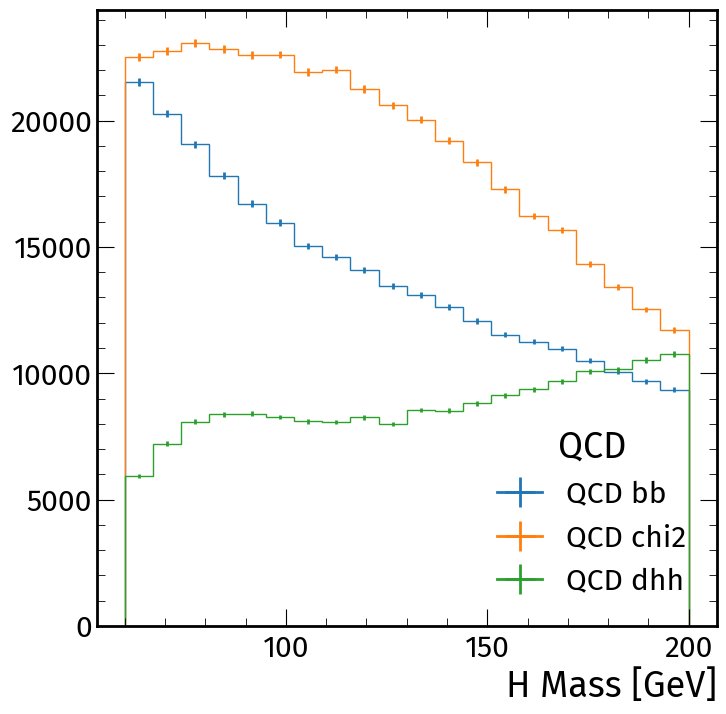

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
h[{"pair": "b", "sample_name": "qcd"}].plot1d(label=f"QCD bb", ax=ax, flow='none')
h[{"pair": "chi2", "sample_name": "qcd"}].plot1d(label=f"QCD chi2", ax=ax, flow='none')
h[{"pair": "dhh", "sample_name": "qcd"}].plot1d(label=f"QCD dhh", ax=ax, flow='none')
ax.legend(title="QCD")